<a href="https://colab.research.google.com/github/dharmasish/Business-case-studies/blob/main/porter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement : predicting delivery duration based on raw input features provided in the dataset

In [ ]:
# Imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- Importing dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/porter/dataset.csv' , low_memory=False)

df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

- there are null values present in the dataset

In [ ]:
df.dropna().describe(include= 'all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,176248.000000,176248,176248,176248,176248,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
unique,NaN,163082,160686,5645,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-11 19:50:43,2015-02-01 03:44:13,d43ab110ab2489d6b9b2caa394bf920f,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,5,927,18223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.743747,NaN,NaN,NaN,NaN,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800
std,1.330911,NaN,NaN,NaN,NaN,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344
min,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000
50%,2.000000,NaN,NaN,NaN,NaN,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000
75%,4.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000


### Observation
1. there seems to be high ouliesr for some of the columns as max value is much geater than 75% values
2. There are implausible entries for columns 'total_onshift_partners' ,'min_item_price' , 'total_busy_partners' and	'total_outstanding_orders' . They should always be positive, but here minimum values is negative

## Calculation Target : delivery time in minutes and seconds

In [ ]:
df['delivery_time'] = (pd.to_datetime(df['actual_delivery_time']) - pd.to_datetime(df['created_at'])).dropna().dt.total_seconds()
df['delivery_time_mins'] = (df['delivery_time'] / 60).round(1)


df[['delivery_time' , 'delivery_time_mins']].describe()



,delivery_time,delivery_time_mins
count,1.974210e+05,197421.000000
mean,2.908257e+03,48.470916
std,1.922961e+04,320.493370
min,1.010000e+02,1.700000
25%,2.104000e+03,35.100000
50%,2.660000e+03,44.300000
75%,3.381000e+03,56.400000
max,8.516859e+06,141947.600000


### there are some outliers in delivery time which needs to be removed

## Filtering and feature engineering
1. Fixed outlier issue for delivery time by limiting delivery time less than 4 hours.
2. Remomoved unplausible negative values for ['min_item_price', 'max_item_price','total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
3. created [month , day ,hour] feature from delivery date
4. categorical features converted from float type to string type

In [ ]:
df = df[(df['delivery_time']/3600) < 4]


col_list =  ['min_item_price', 'max_item_price','total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

df = df[(df[col_list] >= 0).all(axis=1)].dropna()

df ['month' ] = pd.to_datetime(df['actual_delivery_time']).dt.month
df ['day' ] = pd.to_datetime(df['actual_delivery_time']).dt.day_name()
df ['hour' ] = pd.to_datetime(df['actual_delivery_time']).dt.hour

df['market_id'] = df['market_id'].dropna().astype(int).astype(str)
df['order_protocol'] = df['market_id'].dropna().astype(int).astype(str)

## Visualization

<Axes: >

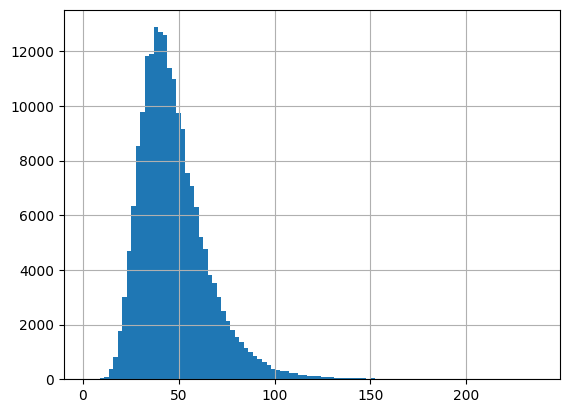

In [ ]:
(df['delivery_time_mins']).hist(bins=100)

<Axes: >

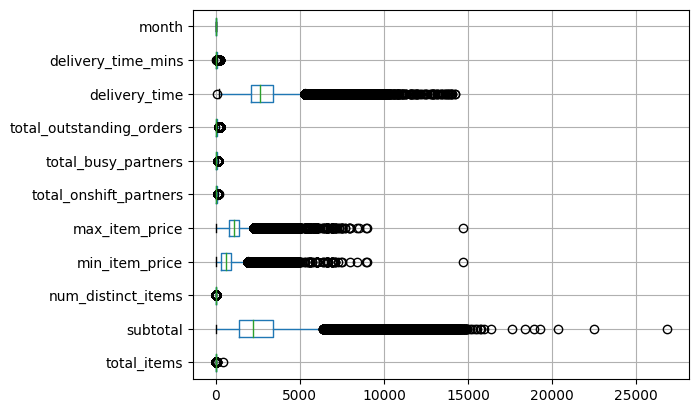

In [ ]:
df.boxplot(rot = 0, vert=False)

<Axes: >

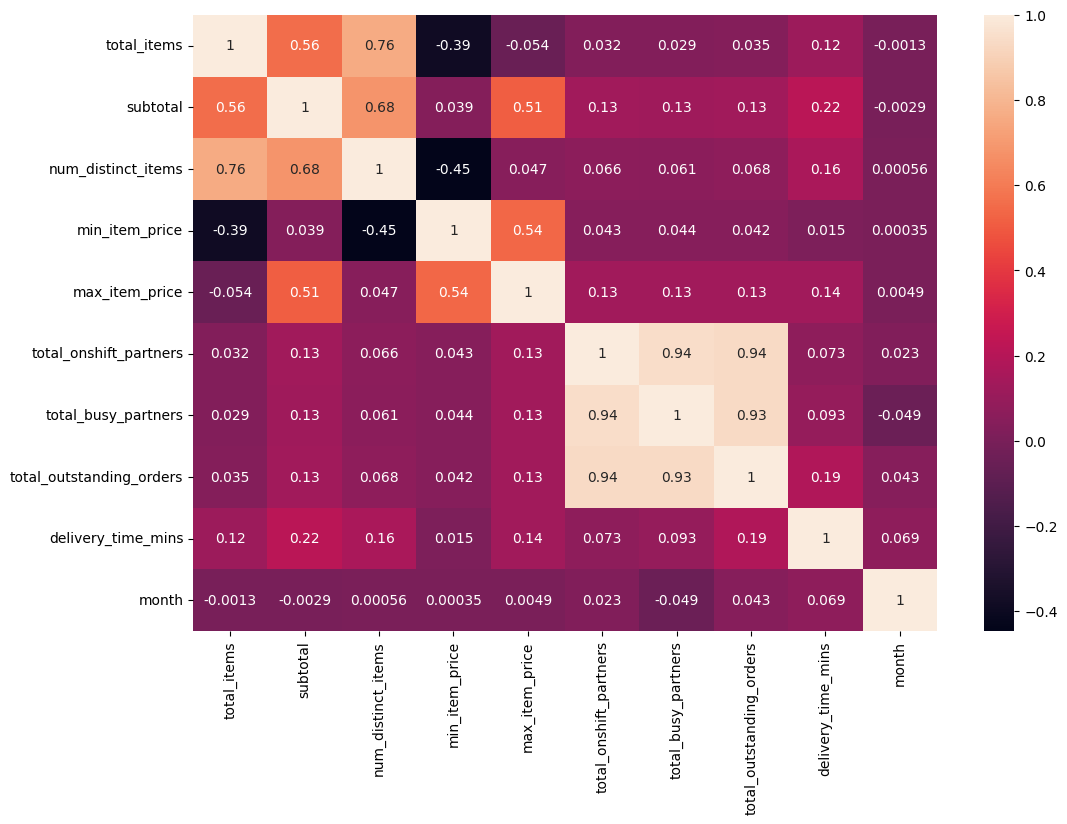

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_reg.corr(), annot = True)

## Preprocessing

In [ ]:
def k_fold_target_encoding(data, column, target, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    encoded_column = np.zeros(data.shape[0])

    for train_index, valid_index in kf.split(data):
        train_data, valid_data = data.iloc[train_index], data.iloc[valid_index]
        train_means = train_data.groupby(column)[target].mean()
        encoded_column[valid_index] = valid_data[column].map(train_means)

    return encoded_column

In [ ]:
df_reg = df.drop( ['created_at' , 'actual_delivery_time' , 'store_id' ,'delivery_time' ], axis=1).copy()

df_reg = pd.get_dummies(df_reg, columns=['market_id' ] )
df_reg = pd.get_dummies(df_reg, columns=[ 'order_protocol'] )
df_reg = pd.get_dummies(df_reg, columns=[ 'day'] )

df_reg['store_primary_category'] = k_fold_target_encoding(df_reg, 'store_primary_category', 'delivery_time_mins').round(2)
df_reg['hour'] = k_fold_target_encoding(df_reg, 'hour', 'delivery_time_mins').round(2)


# target_means = df_reg.groupby('store_primary_category')['delivery_time_mins'].mean()
# df_reg['store_primary_category'] = df_reg['store_primary_category'].map(target_means).round(1)

# target_means = df_reg.groupby('hour')['delivery_time_mins'].mean()
# df_reg['hour'] = df_reg['hour'].map(target_means).round(1)

# df_reg = df_reg.drop('store_primary_category' , axis =1)



df_reg

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_mins,...,order_protocol_4,order_protocol_5,order_protocol_6,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,47.69,4,3441,4,557,1239,33.0,14.0,21.0,63.0,...,0,0,0,1,0,0,0,0,0,0
1,44.19,1,1900,1,1400,1400,1.0,2.0,2.0,67.1,...,0,0,0,0,0,0,0,0,1,0
8,49.58,4,4771,3,820,1604,8.0,6.0,18.0,26.4,...,0,0,0,0,1,0,0,0,0,0
14,50.16,1,1525,1,1525,1525,5.0,6.0,8.0,37.9,...,0,0,0,0,0,0,0,1,0,0
15,50.01,2,3620,2,1425,2195,5.0,5.0,7.0,49.8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,43.77,3,1389,3,345,649,17.0,17.0,23.0,65.1,...,0,0,0,0,0,0,0,0,1,0
197424,43.81,6,3010,4,405,825,12.0,11.0,14.0,56.4,...,0,0,0,1,0,0,0,0,0,0
197425,43.81,5,1836,3,300,399,39.0,41.0,40.0,50.1,...,0,0,0,0,0,1,0,0,0,0
197426,44.00,1,1175,1,535,535,7.0,7.0,12.0,65.1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_reg

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_mins,...,order_protocol_4,order_protocol_5,order_protocol_6,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,47.69,4,3441,4,557,1239,33.0,14.0,21.0,63.0,...,0,0,0,1,0,0,0,0,0,0
1,44.19,1,1900,1,1400,1400,1.0,2.0,2.0,67.1,...,0,0,0,0,0,0,0,0,1,0
2,49.58,4,4771,3,820,1604,8.0,6.0,18.0,26.4,...,0,0,0,0,1,0,0,0,0,0
3,50.16,1,1525,1,1525,1525,5.0,6.0,8.0,37.9,...,0,0,0,0,0,0,0,1,0,0
4,50.01,2,3620,2,1425,2195,5.0,5.0,7.0,49.8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176103,43.77,3,1389,3,345,649,17.0,17.0,23.0,65.1,...,0,0,0,0,0,0,0,0,1,0
176104,43.81,6,3010,4,405,825,12.0,11.0,14.0,56.4,...,0,0,0,1,0,0,0,0,0,0
176105,43.81,5,1836,3,300,399,39.0,41.0,40.0,50.1,...,0,0,0,0,0,1,0,0,0,0
176106,44.00,1,1175,1,535,535,7.0,7.0,12.0,65.1,...,0,0,0,0,0,0,1,0,0,0


## Random forest model with sklearn

In [ ]:


df_reg = df_reg.reset_index()
X = df_reg.drop('delivery_time_mins' , axis=1)
y = df_reg['delivery_time_mins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Train the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 225.6948


In [ ]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on Training Set: {r2_train:.4f}")
print(f"R^2 on Test Set: {r2_test:.4f}")



R^2 on Training Set: 0.9065
R^2 on Test Set: 0.3203


- over fitted model

## Random forest regressor model with pycaret

In [ ]:
!pip install pycaret

In [ ]:
# Import necessary libraries
from pycaret.datasets import get_data
import pycaret.regression as pyreg

df_train, df_val = train_test_split(df_reg, test_size=0.2, random_state=42)

# Initialize setup
reg1 = pyreg.setup(data = df_train, target = 'delivery_time_mins')



,Description,Value
0,Session id,8732
1,Target,delivery_time_mins
2,Target type,Regression
3,Original data shape,"(140886, 31)"
4,Transformed data shape,"(140886, 31)"
5,Transformed train set shape,"(98620, 31)"
6,Transformed test set shape,"(42266, 31)"
7,Numeric features,30
8,Rows with missing values,0.0%
9,Preprocess,True


In [ ]:
model_rf = pyreg.create_model('rf' , fold = 6)

In [ ]:
model_rf

RandomForestRegressor(n_jobs=-1, random_state=8732)

In [ ]:
hyperparameters = model_rf.get_params()
print(hyperparameters)


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 8732, 'verbose': 0, 'warm_start': False}


In [ ]:
test_results = pyreg.predict_model(model_rf, data=None)  # data=None uses the hold-out set





,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,11.0541,226.6023,15.0533,0.3164,0.2953,0.2576


In [ ]:
val_results = pyreg.predict_model(model_rf , data=df_val)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,11.0621,233.4270,15.2783,0.3153,0.2966,0.2575


## Random forest model results:
1. Test R2 = 0.316
2. Validation R2 = 0.315
3. Test MAE = 11mins
4. Validation MAE = 11mins

# NN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_nn = df_reg.dropna().reset_index()
df_nn = df_nn.drop('index' , axis = 1)

X = df_nn.drop('delivery_time_mins' , axis=1)
y = df_nn['delivery_time_mins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train

164061    46.0
97270     65.2
71065     29.9
48727     73.0
35550     45.7
          ... 
119879    40.0
103694    30.1
131932    42.8
146867    66.1
121958    52.4
Name: delivery_time_mins, Length: 140884, dtype: float64

In [ ]:
X

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,month,...,order_protocol_4,order_protocol_5,order_protocol_6,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,47.69,4,3441,4,557,1239,33.0,14.0,21.0,2,...,0,0,0,1,0,0,0,0,0,0
1,44.19,1,1900,1,1400,1400,1.0,2.0,2.0,2,...,0,0,0,0,0,0,0,0,1,0
2,49.58,4,4771,3,820,1604,8.0,6.0,18.0,2,...,0,0,0,0,1,0,0,0,0,0
3,50.16,1,1525,1,1525,1525,5.0,6.0,8.0,2,...,0,0,0,0,0,0,0,1,0,0
4,50.01,2,3620,2,1425,2195,5.0,5.0,7.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176101,43.77,3,1389,3,345,649,17.0,17.0,23.0,2,...,0,0,0,0,0,0,0,0,1,0
176102,43.81,6,3010,4,405,825,12.0,11.0,14.0,2,...,0,0,0,1,0,0,0,0,0,0
176103,43.81,5,1836,3,300,399,39.0,41.0,40.0,1,...,0,0,0,0,0,1,0,0,0,0
176104,44.00,1,1175,1,535,535,7.0,7.0,12.0,2,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(30,)),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)  # No activation for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.1, batch_size=128)


Epoch 1/15
991/991 [==============================] - 7s 6ms/step - loss: 435.0208 - mae: 14.7321 - val_loss: 261.0329 - val_mae: 11.8705
Epoch 2/15
991/991 [==============================] - 5s 5ms/step - loss: 258.6455 - mae: 11.7576 - val_loss: 254.7843 - val_mae: 11.7598
Epoch 3/15
991/991 [==============================] - 4s 4ms/step - loss: 254.4358 - mae: 11.6565 - val_loss: 251.9646 - val_mae: 11.7250
Epoch 4/15
991/991 [==============================] - 4s 4ms/step - loss: 251.8370 - mae: 11.5905 - val_loss: 249.9809 - val_mae: 11.5475
Epoch 5/15
991/991 [==============================] - 6s 6ms/step - loss: 250.0941 - mae: 11.5433 - val_loss: 248.0955 - val_mae: 11.5543
Epoch 6/15
991/991 [==============================] - 4s 4ms/step - loss: 248.7036 - mae: 11.5138 - val_loss: 247.4107 - val_mae: 11.5569
Epoch 7/15
991/991 [==============================] - 4s 4ms/step - loss: 247.6190 - mae: 11.4847 - val_loss: 248.4333 - val_mae: 11.2977
Epoch 8/15
991/991 [==============

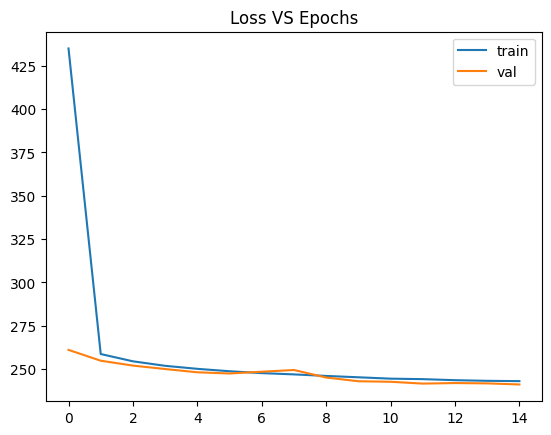

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
mae = history.history["mae"]
val_loss = history.history["val_loss"]
val_mae = history.history["val_mae"]

plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()




In [ ]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on Training Set: {r2_train:.4f}")
print(f"R^2 on Test Set: {r2_test:.4f}")


1101/1101 [==============================] - 2s 2ms/step
R^2 on Training Set: 0.2830
R^2 on Test Set: 0.2637


# design2

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(90, activation='relu'),
    keras.layers.Dense(45, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)  # No activation for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)


Epoch 1/10
3963/3963 [==============================] - 23s 5ms/step - loss: 318.8753 - mae: 12.7907 - val_loss: 259.1713 - val_mae: 11.8701
Epoch 2/10
3963/3963 [==============================] - 19s 5ms/step - loss: 254.9899 - mae: 11.6649 - val_loss: 254.5599 - val_mae: 11.7754
Epoch 3/10
3963/3963 [==============================] - 19s 5ms/step - loss: 251.2686 - mae: 11.5744 - val_loss: 246.8423 - val_mae: 11.3936
Epoch 4/10
3963/3963 [==============================] - 20s 5ms/step - loss: 249.1624 - mae: 11.5111 - val_loss: 244.9380 - val_mae: 11.5361
Epoch 5/10
3963/3963 [==============================] - 19s 5ms/step - loss: 247.4311 - mae: 11.4765 - val_loss: 243.9349 - val_mae: 11.5276
Epoch 6/10
3963/3963 [==============================] - 21s 5ms/step - loss: 246.4952 - mae: 11.4485 - val_loss: 252.2381 - val_mae: 12.0367
Epoch 7/10
3963/3963 [==============================] - 23s 6ms/step - loss: 246.0478 - mae: 11.4387 - val_loss: 242.8421 - val_mae: 11.4852
Epoch 8/10
39

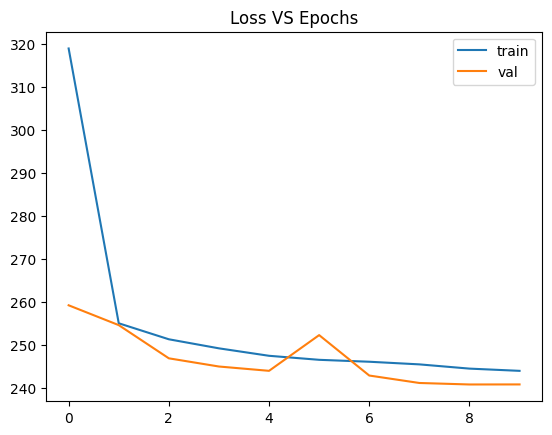

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
mae = history.history["mae"]
val_loss = history.history["val_loss"]
val_mae = history.history["val_mae"]

plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()




In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on Training Set: {r2_train:.4f}")
print(f"R^2 on Test Set: {r2_test:.4f}")


1101/1101 [==============================] - 2s 2ms/step
R^2 on Training Set: 0.2819
R^2 on Test Set: 0.2628


# Design 3

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = keras.Sequential([
    Dense(90, activation='relu'),
    BatchNormalization(),
    Dense(45, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1)  # No activation for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])



In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=300)


Epoch 1/30
423/423 [==============================] - 8s 8ms/step - loss: 2452.0225 - mae: 46.4253 - val_loss: 2374.4023 - val_mae: 45.9031
Epoch 2/30
423/423 [==============================] - 3s 8ms/step - loss: 2044.9424 - mae: 42.1855 - val_loss: 1834.9087 - val_mae: 39.8273
Epoch 3/30
423/423 [==============================] - 5s 11ms/step - loss: 1518.7676 - mae: 35.5036 - val_loss: 1284.1046 - val_mae: 32.2343
Epoch 4/30
423/423 [==============================] - 4s 10ms/step - loss: 996.3721 - mae: 27.3034 - val_loss: 763.8175 - val_mae: 22.9852
Epoch 5/30
423/423 [==============================] - 3s 8ms/step - loss: 599.2504 - mae: 19.3118 - val_loss: 461.0208 - val_mae: 16.0629
Epoch 6/30
423/423 [==============================] - 3s 8ms/step - loss: 370.2489 - mae: 13.8246 - val_loss: 305.5952 - val_mae: 12.2438
Epoch 7/30
423/423 [==============================] - 4s 9ms/step - loss: 276.4992 - mae: 11.6701 - val_loss: 250.5610 - val_mae: 11.2173
Epoch 8/30
423/423 [======

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on Training Set: {r2_train:.4f}")
print(f"R^2 on Test Set: {r2_test:.4f}")


1101/1101 [==============================] - 3s 3ms/step
R^2 on Training Set: 0.2946
R^2 on Test Set: 0.2762


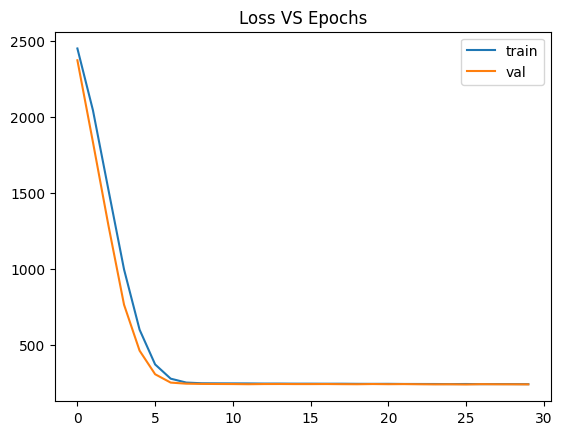

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
mae = history.history["mae"]
val_loss = history.history["val_loss"]
val_mae = history.history["val_mae"]

plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()



# design 4

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = keras.Sequential([
    Dense(80, activation='relu'),
    BatchNormalization(),
    Dense(40, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(20, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(1)  # No activation for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])





In [ ]:
history = model.fit(X_train, y_train  , epochs=15, validation_split=0.1, batch_size=100)

Epoch 1/15
1268/1268 [==============================] - 26s 13ms/step - loss: 2081.2847 - mae: 42.0618 - val_loss: 1326.0679 - val_mae: 32.6956
Epoch 2/15
1268/1268 [==============================] - 16s 13ms/step - loss: 712.4168 - mae: 21.1038 - val_loss: 326.0765 - val_mae: 12.6015
Epoch 3/15
1268/1268 [==============================] - 13s 11ms/step - loss: 273.6043 - mae: 11.7919 - val_loss: 248.8954 - val_mae: 11.4699
Epoch 4/15
1268/1268 [==============================] - 17s 13ms/step - loss: 256.6393 - mae: 11.6928 - val_loss: 245.9912 - val_mae: 11.3504
Epoch 5/15
1268/1268 [==============================] - 11s 9ms/step - loss: 255.1669 - mae: 11.6622 - val_loss: 247.5771 - val_mae: 11.3838
Epoch 6/15
1268/1268 [==============================] - 11s 9ms/step - loss: 254.6591 - mae: 11.6493 - val_loss: 245.6290 - val_mae: 11.4292
Epoch 7/15
1268/1268 [==============================] - 12s 9ms/step - loss: 253.5301 - mae: 11.6230 - val_loss: 245.2652 - val_mae: 11.4095
Epoch 8

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on Training Set: {r2_train:.4f}")
print(f"R^2 on Test Set: {r2_test:.4f}")


1101/1101 [==============================] - 2s 2ms/step
R^2 on Training Set: 0.2748
R^2 on Test Set: 0.2615


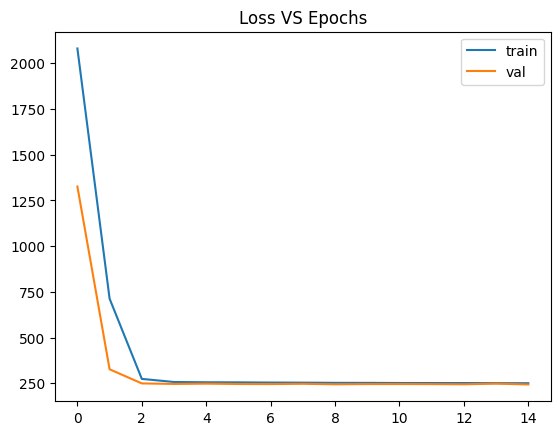

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
mae = history.history["mae"]
val_loss = history.history["val_loss"]
val_mae = history.history["val_mae"]

plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()



## best results from nn model

- train R2 = 0.3
- test R2 = 0.28

In [ ]:
import numpy as np

# Define the probability distributions
P = np.array([0.2, 0.4, 0.1, 0.3])
Q = np.array([0.3, 0.3, 0.2, 0.2])

# Calculate the KL divergence
kl_divergence = np.sum(P * np.log(P / Q))

print(kl_divergence)


0.0863046217355343
